## Model Analysis: one_hidden_net 

In [70]:
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [16]:
pred = pd.read_csv('../src/predict/predictions/one_hidden_test_audio_20f.csv', names=['orig'])
pred_sig = pd.read_csv('../src/predict/predictions/one_hidden_test_audio_20f_sig.csv', names=['sig'])
pred_sgd = pd.read_csv('../src/predict/predictions/one_hidden_test_audio_20f_sig_sgd.csv', names=['sgd'])
pred_adam = pd.read_csv('../src/predict/predictions/one_hidden_test_audio_20f_sig_adam.csv', names=['adam'])
true = pd.read_csv('../../../Source/Data/y_test_mfccplus.csv')

In [109]:
results = pd.concat([pred, pred_sig, pred_sgd, pred_adam, true], axis= 1)
results.head()

,orig,sig,sgd,adam,Labels
0,1,1,1,1,1
1,1,1,1,1,1
2,1,1,0,1,1
3,0,0,0,0,0
4,0,0,1,1,0


In [90]:
mistakes = results.copy()
mistakes = mistakes.loc[~(mistakes['Labels'] == mistakes['orig']| mistakes['sig'] | mistakes['sgd'] | mistakes['adam'])]
#mistakes

In [75]:
acc_dict = {}
for i in results.columns[:4]:
    acc_dict[str(i)]= accuracy_score(y_pred=results[str(i)], y_true=results['Labels'])

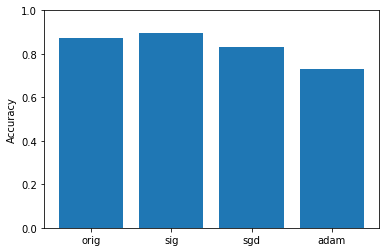

In [80]:
plt.bar(range(len(acc_dict)), acc_dict.values(), align='center')
plt.xticks(range(len(acc_dict)), list(acc_dict.keys()))
plt.ylabel('Accuracy')
plt.ylim(0,1);

In [91]:
acc_dict

{'orig': 0.8717948717948718,
 'sig': 0.8974358974358975,
 'sgd': 0.8333333333333334,
 'adam': 0.7307692307692307}

## Training Errors

In [98]:
error = pd.read_csv('../src/train/train_errors/vanilla_mfccplus.csv', names=['vanilla'])
error_2 = pd.read_csv('../src/train/train_errors/one_hidden.csv', names=['one_hid'])
error_3 = pd.read_csv('../src/train/train_errors/one_hidden_20f.csv', names=['one_hid_20f'])
error_4 = pd.read_csv('../src/train/train_errors/one_hidden_20f_sig.csv', names=['one_hid_20f_sig'])
error_5 = pd.read_csv('../src/train/train_errors/one_hidden_20f_sig_sgd.csv', names=['one_hid_20f_sgd'])
error_6 = pd.read_csv('../src/train/train_errors/one_hidden_20f_sig_adam.csv', names=['one_hid_20f_adam'])

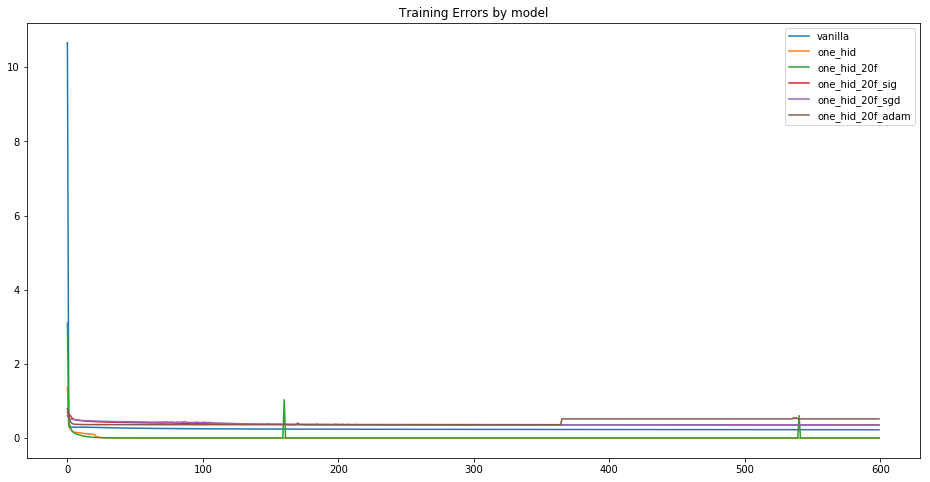

In [108]:
train_errors = pd.concat([error, error_2, error_3, error_4, error_5, error_6], axis =1)
train_errors.plot(figsize=(16,8), title='Training Errors by model');